In [4]:
import pandas as pd
import sys
sys.path.append('/Users/petigura/Research/CKS-Cool/')
import keprat.io
reload(keprat.io)

<module 'keprat.io' from 'keprat/io.pyc'>

In [8]:
cks = keprat.io.load_table('cksgaia-planets')
cks.f18_kepmag()

read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


AttributeError: 'DataFrame' object has no attribute 'f18_kepmag'

In [51]:
%pylab inline
sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)
cks = keprat.io.load_table('cksgaia-planets')
cks = pd.merge(cks,sc,how='left')
temp = cks.groupby('id_koicand')['line'].count()
temp = cks.groupby('id_koicand')['line'].count()
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have at least 30 days of short cadence".format((temp >0).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)

Populating the interactive namespace from numpy and matplotlib
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf
376/907 CKS-VII planets have no short cadence
531/907 CKS-VII planets have at least 30 days of short cadence
437/907 CKS-VII planets have 90 days of short cadence


In [50]:
%pylab inline
sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)
t18 = keprat.io.load_table('t18')

t18 = keprat.io.load_table('t18')
t18 = t18[~t18.t18_disposition.str.contains('FALS')]

t18 = pd.merge(t18,sc,how='left')
temp = t18.groupby('id_koicand')['line'].count()
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have at least 30 days of short cadence".format((temp >0).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

sc = pd.read_table('data/wget_all_prior_SC.bat',comment='#',header=None,names=['line'])
sc['id_kic'] = sc.line.apply(lambda x :x.split('"')[1].split('/')[-1].split('-')[0].replace('kplr','')).astype(int)

Populating the interactive namespace from numpy and matplotlib
2727/4078 CKS-VII planets have no short cadence
1351/4078 CKS-VII planets have at least 30 days of short cadence
1138/4078 CKS-VII planets have 90 days of short cadence


,t18_disposition,t18_score,t18_period,t18_period_err1,t18_period_err2,t18_ror,t18_ror_err1,t18_ror_err2,t18_prad,t18_prad_err1,...,t18_max_sngle_ev,t18_max_mult_ev,t18_model_snr,t18_count,t18_num_transits,t18_tce_plnt_num,t18_tce_delivname,t18_quarters,t18_bin_oedp_sig,id_koi
rowid,,,,,,,,,,,,,,,,,,,,,
6,FALSE POSITIVE,0.000,1.334101,1.655000e-06,-1.655000e-06,0.010106,0.000245,-0.000169,1.74,0.31,...,4.849225,21.526688,43.0,1,799,1,q1_q17_dr25_tce,11111011101110111000000000000000,0.8166,6
8,FALSE POSITIVE,0.000,1.160153,8.680000e-07,-8.680000e-07,0.013013,0.001035,-0.001012,1.40,0.20,...,6.059168,36.647564,48.4,1,1151,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.9397,8
9,FALSE POSITIVE,0.000,3.719809,9.390000e-07,-9.390000e-07,0.340144,0.152656,-0.106236,87.21,16.61,...,57.104050,579.887800,373.9,1,364,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.0059,9
11,FALSE POSITIVE,0.000,3.747838,3.896000e-06,-3.896000e-06,0.151387,1.088740,-0.032970,13.65,3.11,...,14.434505,98.600310,138.2,1,358,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.8610,11
14,FALSE POSITIVE,0.000,2.947377,3.228000e-06,-3.228000e-06,1.654364,10.975370,-0.706674,403.59,85.99,...,31.110800,318.781200,62.3,1,454,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.1758,14
15,FALSE POSITIVE,0.000,3.012477,1.161000e-06,-1.161000e-06,0.294213,0.500395,-0.098038,65.25,19.12,...,90.499620,372.387150,253.4,1,354,1,q1_q17_dr25_tce,11111011101110111000000000000000,0.9839,15
16,FALSE POSITIVE,0.000,0.895278,5.070000e-07,-5.070000e-07,0.025524,0.000263,-0.001524,9.27,2.27,...,49.070526,202.259030,132.1,1,1499,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.0789,16
19,FALSE POSITIVE,0.000,1.203201,2.960000e-07,-2.960000e-07,0.334324,3.044130,-0.039568,49.25,8.83,...,72.828850,1460.871700,250.8,1,1110,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.0000,19
21,FALSE POSITIVE,0.000,4.288515,1.074000e-06,-1.074000e-06,0.349955,0.585110,-0.166704,76.51,16.12,...,50.984440,563.292050,292.1,1,313,1,q1_q17_dr25_tce,11111111111111111000000000000000,0.8632,21


Populating the interactive namespace from numpy and matplotlib
376/907 CKS-VII planets have no short cadence
85/907 CKS-VII planets have 30 days of short cadence
437/907 CKS-VII planets have 90 days of short cadence
29/907 CKS-VII planets have 90 days of short cadence


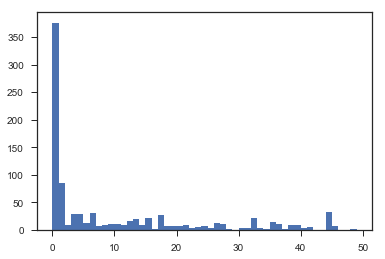

In [32]:
%pylab inline
temp = cks.groupby('id_koicand')['line'].count()
hist(temp,bins=arange(0,50,1))
print "{}/{} CKS-VII planets have no short cadence".format((temp ==0).sum(),temp.count())
print "{}/{} CKS-VII planets have 30 days of short cadence".format((temp ==1).sum(),temp.count())
print "{}/{} CKS-VII planets have 90 days of short cadence".format((temp >= 3).sum(),temp.count())

id_koicand
K00001.01    38
K00002.01    49
K00006.01     3
K00007.01    28
K00008.01     3
K00010.01    31
K00017.01    24
K00018.01    33
K00020.01    25
K00022.01    36
K00041.01    44
K00041.02    44
K00041.03    44
K00046.01    10
K00046.02    10
K00049.01    10
K00063.01    45
K00069.01    45
K00070.01    44
K00070.02    44
K00070.03    44
K00070.04    44
K00070.05    44
K00072.01    34
K00072.02    34
K00082.01    45
K00082.02    45
K00082.03    45
K00082.04    45
K00082.05    45
             ..
K04637.01     1
K04640.01     0
K04651.01     0
K04653.01     0
K04657.01     0
K04657.02     0
K04659.01     0
K04665.01     0
K04674.01     0
K04693.01     0
K04699.01     0
K04715.01     0
K04716.01     0
K04725.01     0
K04744.01     0
K04765.01     0
K04771.01     0
K04773.01     0
K04774.01     0
K04792.01     0
K04822.01     0
K04829.01     0
K04829.02     0
K04833.01     0
K04839.01     0
K04850.01     0
K04907.01     0
K05236.01     0
K05900.01     0
K05949.01     0
Name: line, L

In [67]:
cks

,id_starname,id_kic,id_koi,id_koicand,id_kepler_name,koi_disposition,koi_period,koi_period_err1,koi_period_err2,koi_time0,...,dr25_ror_v18_srad,dr25_ror_v18_srad_err1,dr25_ror_gdir_srad,dr25_ror_gdir_srad_err1,v18_ror_gdir_srad,v18_ror_gdir_srad_err1,tau0,tau,multi,line
0,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
1,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
2,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
3,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
4,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
5,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
6,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
7,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
8,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."
9,K00889,757450,889.0,K00889.01,Kepler-75 b,CONFIRMED,8.884923,1.405000e-06,-1.405000e-06,2455002.992,...,NaN,NaN,11.802615,0.412225,NaN,NaN,4.019727,1.856715,False,"wget ""http://exoplanetarchive/data/ETSS/Kepler..."


In [38]:
cks = keprat.io.load_table('cksgaia-planets')
cks = cks.query('kic_kepmag < 14.2')

read table cksgaia-planets from ../CKS-Gaia/load_table_cache.hdf
read table v18 from load_table_cache.hdf
read table dr25 from load_table_cache.hdf


1249